   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

sentiment140.py:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

The repository for sentiment140 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sentiment140.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/1600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/498 [00:00<?, ? examples/s]

✓ Data loaded. Sample tweet: Made a guy Jelious  that will show him Lol

Hourly Sentiment Trends:
   hour  tweet_count  avg_sentiment  negative_tweets
0    00           21           1.14               15
1    01           21           1.90               11
2    02           21           2.10               10
3    03           21           2.10               10
4    04           21           2.10               10
5    05           21           1.90               11
6    06           21           1.90               11
7    07           21           1.71               12
8    08           21           1.52               13
9    09           21           2.10               10
10   10           21           2.10               10
11   11           21           1.90               11
12   12           21           2.48                8
13   13           21           2.48                8
14   14           21           1.52               13
15   15           21           1.71               12
1

<ipython-input-1-ef63b158db04>:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["created_at"] = pd.date_range(start="2023-01-01", periods=len(df), freq="H")


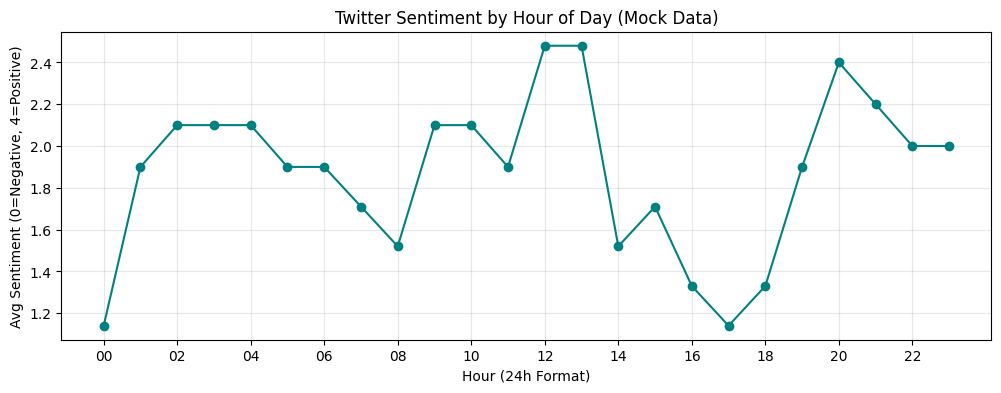

In [1]:
# Step 1: Install/Import (safe version)
!pip install sqlalchemy pandas datasets --quiet
import sqlite3
import pandas as pd
from datasets import load_dataset

# Step 2: Load Twitter Data
try:
    dataset = load_dataset("sentiment140", split="train").shuffle().select(range(500))
    df = dataset.to_pandas()
    print("✓ Data loaded. Sample tweet:", df.iloc[0]["text"])
except Exception as e:
    print("Error loading data:", str(e))

# Step 3: Add Mock Timestamps (for hourly analysis)
import numpy as np
df["created_at"] = pd.date_range(start="2023-01-01", periods=len(df), freq="H")

# Step 4: SQL Analysis
conn = sqlite3.connect(":memory:")
df.to_sql("tweets", conn)

# Key Query - Hourly Sentiment Trends
query = """
SELECT
    strftime('%H', created_at) AS hour,
    COUNT(*) AS tweet_count,
    ROUND(AVG(sentiment), 2) AS avg_sentiment,
    SUM(CASE WHEN sentiment < 2 THEN 1 ELSE 0 END) AS negative_tweets
FROM tweets
GROUP BY hour
ORDER BY hour
"""

results = pd.read_sql(query, conn)
print("\nHourly Sentiment Trends:")
print(results.head(24))

# Step 5: Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(results["hour"], results["avg_sentiment"], marker='o', color='teal')
plt.title("Twitter Sentiment by Hour of Day (Mock Data)")
plt.xlabel("Hour (24h Format)")
plt.ylabel("Avg Sentiment (0=Negative, 4=Positive)")
plt.xticks(range(0, 24, 2))
plt.grid(alpha=0.3)
plt.show()

In [3]:
# Save results
results.to_csv("hourly_sentiment.csv", index=False)
from google.colab import files
files.download("hourly_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>